# Function Identification and Parameter Estimation
Often we have a set of data describing a physical process that we wish to develop a mathematical model of.  The term __curve fitting__ is used to describe the process of finding a curve, and the function generating the curve, to describe a given set of data.  The term __parameter estimation__ refers to the process of obtaining values for the parameters, or coefficients, in the function that describes the data.

Most physical phenomenon can be represented by one of the following functions:
1. <a href='#Linear'>Linear:</a> $y(x) = mx + b$ 
2. <a href='#Exponential'>Exponential:</a> $y(x) = b(10)^{mx}$ or $y(x) = be^{mx}$
3. <a href='#Power'>Power Law:</a> $y(x) = bx^m$
4. <a href='#Polynomial'>Polynomial:</a> $y(x) = a_nx^n + a_{n-1}x^{n-1} + \cdots a_1x + a_0$

For the exercises presented in this Jupyter notebook, we will need to import a couple of libraries.  Let's do that now before proceeding with the lessons.

In [20]:
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Function <a id='Linear'></a>
A linear function gives a straight line when plotted on rectilinear axes and is described by the following functional form

$$ y = mx + b, $$
where $y$ is the dependent variable (_i.e._ the system output), $x$ is the independent variable, $m$ and $b$ are the slope and intercept of the curve and the quantities we seek for our model.

### Data Generation
To practice linear curve fitting, let's begin by generating some test data that we know the solution to and then use the curve fitting tools to perform the fit.  We'll start by writing a function to generate some linear data along with some random noise to make it realistic.  In practice, this data might come from some kind of measurements.

In [21]:
# Function to calculate a linear function with constants m and b
def linear(x, m, b):
    return m*x+b

Now we will generate some dummy data based on a user defined value of slope $m$ and intercept $b$ and a range of $x$-values.  For this example we will _arbitrarily_ set the following parameters:

$$ m = -6, \qquad b = 11, \qquad x = 0 \ldots 1 $$

In [22]:
m = -6    # Set the slope value
b = 11    # Set the intercept value

# Set the x-value range.
start = 1e-6
stop = 1
num = 11
x = np.linspace(start, stop, num)

Next, we will compute the $y$-values and add in a little random noise by drawing a random number from the normal (Gaussian) distribution.  This hopefully will add a little "realism" to the data.

In [23]:
y = linear(x, m, b)
noise = 0.2*np.random.normal(size=y.size)
y = y + noise

Let's plot the data to see what it looks like and to _visually_ determine if a linear curve fit might be appropriate.

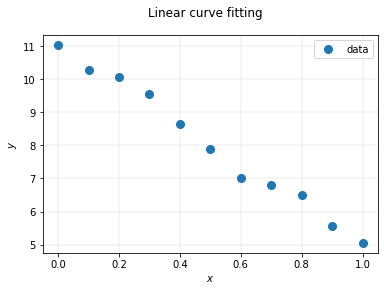

In [24]:
fig = plt.figure()
fig.suptitle('Linear curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.legend();

### Curve Fit
We can now fit our data to the general linear function already defined to extract the $b$ and $b$ parameters, and plot the fit against the data.

The __inputs__ to the `curve_fit` function are as follows:

`f`: the function used for fitting (in this case we defined our function and named it `linear` <br>
`xdata`: array of x-data for fitting <br>
`ydata`: array of y-data for fitting <br>
`p0`: array of initial guesses for the fitting parameters (both $m$ and $m$ as 0) <br>
`bounds`: bounds for the parameters (in this case we set them as $-\infty$ to $\infty$) <br>

The __outputs__ are:

`pars`: array of parameters from fit (in this case it will return $m$ and $b$) <br>
`cov`: the estimated covariance of `pars` which can be used to determine the standard deviations of the fitting parameters (square roots of the diagonals) <br>

In [25]:
pars, cov = curve_fit(f=linear, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf,np.inf))
md(f"$m = {pars[0]:.4f}; \qquad b = {pars[1]:.4f}$")

$m = -6.0546; \qquad b = 11.0632$

Let's replot with the curve fit and see how it looks.

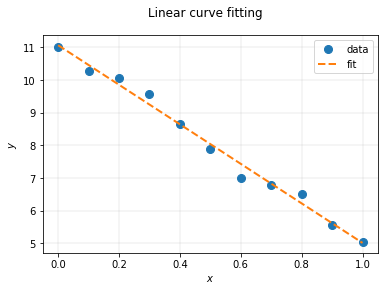

In [26]:
# Compute y-values for curve fit
yfit = linear(x, pars[0], pars[1])

# Plot original data with curve fit on set of axes
fig = plt.figure()
fig.suptitle('Linear curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.plot(x,yfit,'--',label=r'fit')
ax.legend();

## Exponential <a id='Exponential'></a>
Let's now look at a general exponential function such as

$$ y = be^{mx}, $$
where $y$ is the dependent variable (_i.e._ the system output), $x$ is the independent variable, $m$ and $b$ are constants.

In [27]:
# Function to calculate an exponential function with constants a and b
def exponential(x, m, b):
    return b*np.exp(m*x)

### Data Generation
Again, we will generate some fictitious data to use to test the curve fitting.  For this example, we will use the following parameters:

$$ m = 0.5; \qquad b = 0.5; \qquad x = 5 \ldots 15 $$

In [28]:
b = 0.5
m = 0.5

# Set the x-value range.
start = 5
stop = 15
num = 50
x = np.linspace(start, stop, num)

Next, we will compute the  𝑦-values and add in a little random noise by drawing a random number from the normal (Gaussian) distribution. This hopefully will add a little "realism" to the data.

In [29]:
y = exponential(x, m, b)
noise = 5*np.random.normal(size=y.size)
y = y + noise

Let's plot the data to see what it looks like and to _visually_ determine if an exponential curve fit might be appropriate.

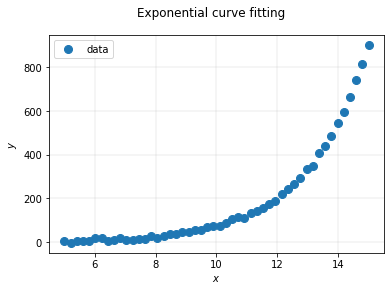

In [30]:
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.legend();

Notice that it becomes a little more difficult to decide if the curve fit should be exponential, or perhaps power-law or even general polynomial.  To help decide, we can instead try plotting on a semi-log scale.  

You might have asked __how does this help?__  To answer that question, let's algebraically manipulate the exponential model and see.  Taking the original model

$$ y = be^{mx} $$

and taking the natural log $\ln$ of both sides reveals

$$ \ln{y} = mx + b $$

which clearly reveals that if we were to plot using a semi-log scale (y-axis) on log scale and if the data followed an exponential then the data would follow a straight-line.  Replotting

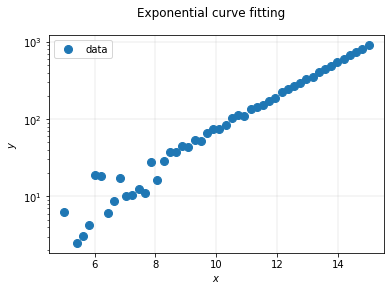

In [31]:
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.semilogy(x,y,'o',markersize=8,label=r'data')
ax.legend();

Note that we didn't actually change the data, we merely plotted on a different scale.  Aside from the noise at the lower end of $x$-values, the data appears to follow a straight-line and hence should be fit well with an exponential function.

In [32]:
pars, cov = curve_fit(f=exponential, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf,np.inf))
md(f"$m = {pars[0]:.4f}; \qquad b = {pars[1]:.4f}$")

$m = 0.5018; \qquad b = 0.4869$

Let's replot with the curve fit and see how it looks.

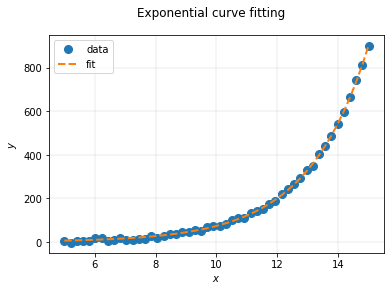

In [33]:
# Compute y-values for curve fit
yfit = exponential(x, pars[0], pars[1])

# Plot original data with curve fit on set of axes
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.plot(x,yfit,'--',label=r'fit')
ax.legend();

## Power Law <a id='Power'></a>
Let's now look at a general power function such as

$$ y = bx^m, $$
where $y$ is the dependent variable (_i.e._ the system output), $x$ is the independent variable, $m$ and $b$ are constants.

Similar to how we did the previous fitting, we first define the function:

In [34]:
def power_law(x, m, b):
    return b*np.power(x, m)

We then again can create a fictitious dataset, add noise, and plot our power-law function.  For this example we will use the following values:

$$ m = 0.5; \qquad b = 1.0; \qquad x = 1 \ldots 1000 $$

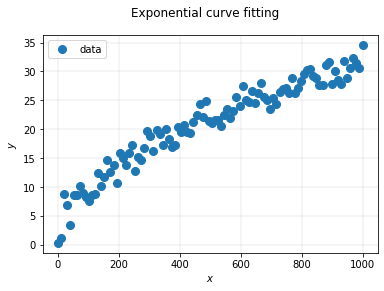

In [35]:
b = 1.0
m = 0.5

# Set the x-value range.
start = 1
stop = 1000
num = 100
x = np.linspace(start, stop, num)

# Calculate y-values and add noise
y = power_law(x, m, b)
noise = 1.5*np.random.normal(size=y.size)
y = y + noise

# Plot the data
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.legend();

Since it is difficult to tell what model best represents this data, let's plot on log-log scale and check for power-law.  Again, you should be asking how this would help so let's first examine the implications of plotting on log-log scale.

Taking the log of both sides of the model equation

$$ \ln(y) = m\ln(x) + b $$

which is clearly a straight-line on log-log scale.

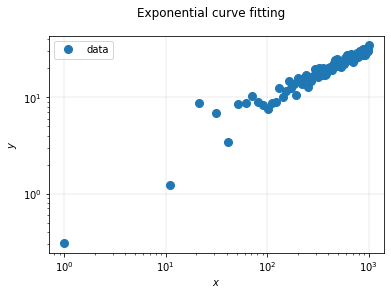

In [36]:
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.legend();

Again, aside from some of the random scatter, the data seems to follow a straight-line on log-log scales so it the power-law should provide a good fit.

In [37]:
pars, cov = curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf,np.inf))
md(f"$m = {pars[0]:.4f}; \qquad b = {pars[1]:.4f}$")

$m = 0.5087; \qquad b = 0.9372$

Let's replot with the curve fit and see how it looks.

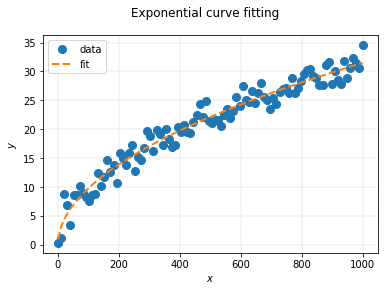

In [39]:
# Compute y-values for curve fit
yfit = power_law(x, pars[0], pars[1])

# Plot original data with curve fit on set of axes
fig = plt.figure()
fig.suptitle('Exponential curve fitting')
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)
ax.plot(x,y,'o',markersize=8,label=r'data')
ax.plot(x,yfit,'--',label=r'fit')
ax.legend();

## General Polynomial <a id='Polynomial'></a>